In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("parent_clean.csv")

In [7]:
print(df.shape)
df.head()

(56784, 27)


,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,...,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,speed_gap,aggressive
0,0,android_turns.csv,4.0,10.394929,7.244125,0.016991,2.0,1.480796,17.323687,6.789408,...,0.800598,0.854956,8.662511,9.521707,67.596880,69.319600,22.941639,20.335337,-10.534279,0
1,0,android_turns.csv,4.0,9.401910,7.497719,0.016103,2.0,1.693853,6.197542,10.101060,...,1.051501,1.147173,9.708605,11.245602,80.071320,84.723694,20.737572,21.819538,3.903518,0
2,0,android_turns.csv,5.0,11.290954,4.244563,0.008359,2.0,21.173470,11.229438,9.081976,...,1.494703,1.494703,11.732657,24.616348,44.000920,105.462135,18.996666,29.467962,-2.147462,0
3,0,android_turns.csv,5.0,12.743101,3.173500,0.007654,1.0,15.306123,10.714942,13.421639,...,1.770240,1.770240,10.335592,17.929585,45.601433,57.610783,23.959110,21.440578,2.706697,0
4,0,android_turns.csv,5.0,8.986107,5.990321,0.013587,0.0,19.387754,2.729067,20.937756,...,1.698927,2.619599,11.501888,2.787075,74.401410,16.806042,91.713660,12.708904,18.208689,0


In [10]:
# remove rows with non-finite values in key columns we’ll plot/clean
key_cols = [c for c in ["eventType","eventSampleSpeed","eventDurationSeconds",
                        "eventMilesDriven","gyroAngleChange","mems_radius"] if c in df.columns]
df = df[np.all(np.isfinite(df[key_cols]), axis=1)]
print("After finite filter:", df.shape)

After finite filter: (56784, 27)


eventType kept 56784 / 56784


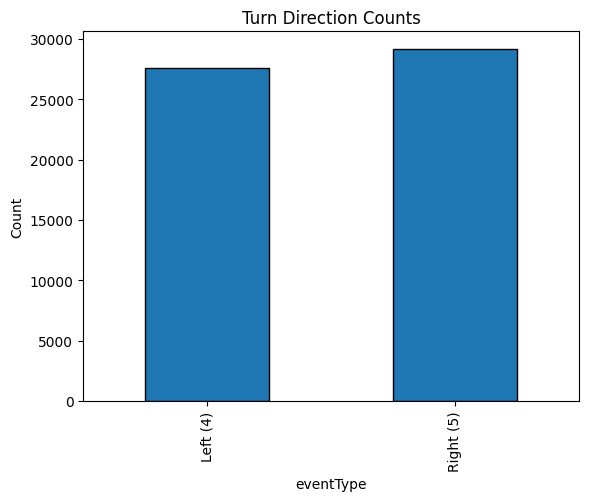

In [11]:
# === eventType: counts, not boxplot ===
if "eventType" in df.columns:
    # keep only left/right codes if others slipped in
    before = len(df)
    df = df[df["eventType"].isin([4,5])]
    print(f"eventType kept {len(df)} / {before}")

    ax = df["eventType"].map({4:"Left (4)", 5:"Right (5)"}).value_counts().sort_index().plot(
        kind="bar", edgecolor="black"
    )
    plt.title("Turn Direction Counts")
    plt.xlabel("eventType")
    plt.ylabel("Count")
    plt.show()

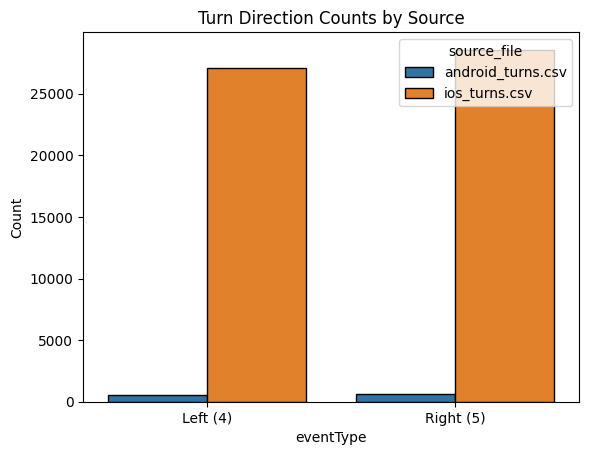

In [14]:
  # share by source if available
if "source_file" in df.columns:
        vc = (df.assign(tt=df["eventType"].map({4:"Left (4)",5:"Right (5)"}))
                .groupby(["source_file","tt"]).size().reset_index(name="count"))
        sns.barplot(data=vc, x="tt", y="count", hue="source_file", edgecolor="black")
        plt.title("Turn Direction Counts by Source")
        plt.xlabel("eventType")
        plt.ylabel("Count")
        plt.show()

count    56784.000000
mean        15.531978
std          7.884406
min          5.001024
25%          9.934825
50%         13.899657
75%         19.010956
max        101.684990
Name: eventSampleSpeed, dtype: float64


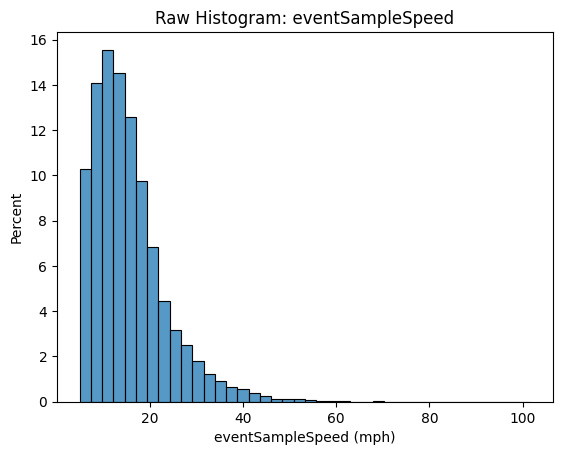

eventSampleSpeed kept 56784 / 56784


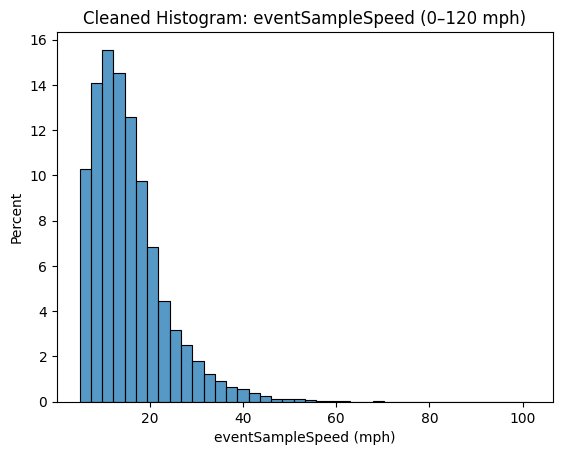

In [15]:
# === eventSampleSpeed (mph): keep [0, 120] ===
if "eventSampleSpeed" in df.columns:
    print(df["eventSampleSpeed"].describe())

    sns.histplot(df["eventSampleSpeed"], bins=40, stat="percent", edgecolor="black")
    plt.title("Raw Histogram: eventSampleSpeed")
    plt.xlabel("eventSampleSpeed (mph)")
    plt.ylabel("Percent")
    plt.show()

    m_before = len(df)
    df = df[(df["eventSampleSpeed"] >= 0) & (df["eventSampleSpeed"] <= 120)]
    print(f"eventSampleSpeed kept {len(df)} / {m_before}")

    sns.histplot(df["eventSampleSpeed"], bins=40, stat="percent", edgecolor="black")
    plt.title("Cleaned Histogram: eventSampleSpeed (0–120 mph)")
    plt.xlabel("eventSampleSpeed (mph)")
    plt.ylabel("Percent")
    plt.show()

count    56784.000000
mean         5.012753
std          3.074691
min          0.914496
25%          2.976483
50%          4.703578
75%          6.176000
max         24.980251
Name: eventDurationSeconds, dtype: float64


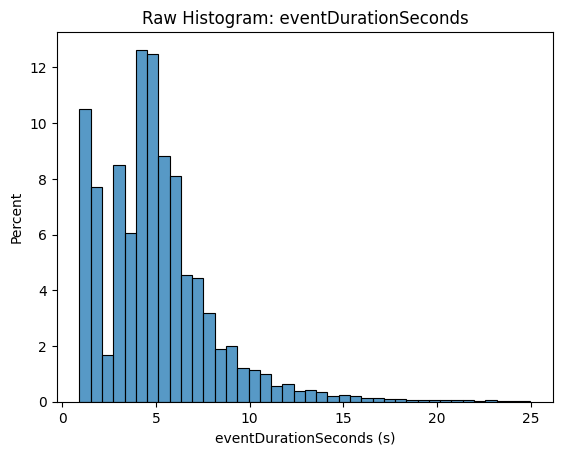

eventDurationSeconds kept 56567 / 56784


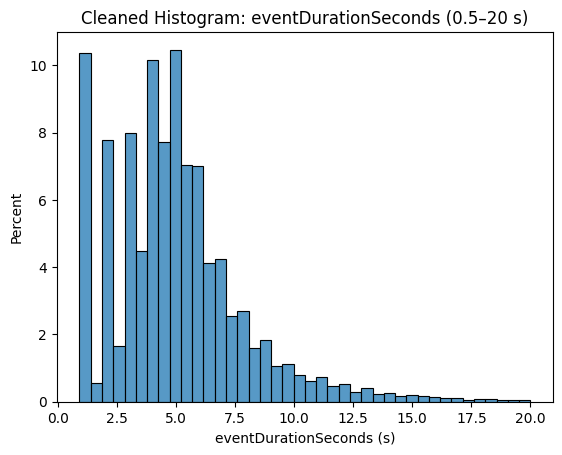

In [16]:
# === eventDurationSeconds: keep [0.5, 20] ===
if "eventDurationSeconds" in df.columns:
    print(df["eventDurationSeconds"].describe())

    sns.histplot(df["eventDurationSeconds"], bins=40, stat="percent", edgecolor="black")
    plt.title("Raw Histogram: eventDurationSeconds")
    plt.xlabel("eventDurationSeconds (s)")
    plt.ylabel("Percent")
    plt.show()

    m_before = len(df)
    df = df[(df["eventDurationSeconds"] >= 0.5) & (df["eventDurationSeconds"] <= 20)]
    print(f"eventDurationSeconds kept {len(df)} / {m_before}")

    sns.histplot(df["eventDurationSeconds"], bins=40, stat="percent", edgecolor="black")
    plt.title("Cleaned Histogram: eventDurationSeconds (0.5–20 s)")
    plt.xlabel("eventDurationSeconds (s)")
    plt.ylabel("Percent")
    plt.show()

count    56567.000000
mean         0.022010
std          0.019911
min          0.000000
25%          0.010317
50%          0.016936
75%          0.027085
max          1.007121
Name: eventMilesDriven, dtype: float64


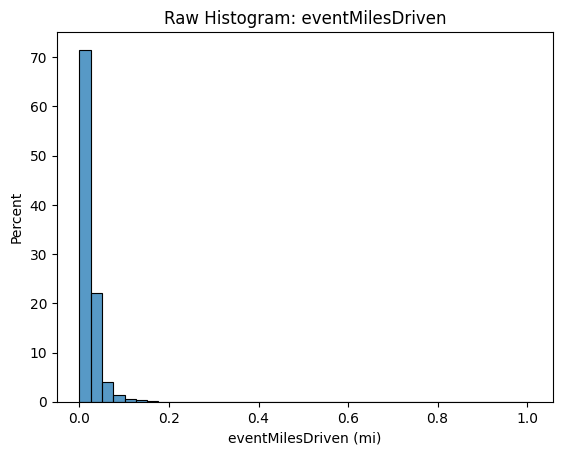

eventMilesDriven kept 56566 / 56567


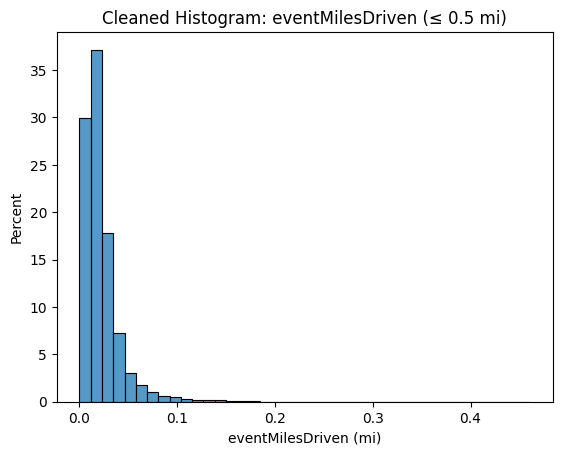

In [17]:
# === eventMilesDriven (mi): keep [0, 0.5] ===
if "eventMilesDriven" in df.columns:
    print(df["eventMilesDriven"].describe())

    sns.histplot(df["eventMilesDriven"], bins=40, stat="percent", edgecolor="black")
    plt.title("Raw Histogram: eventMilesDriven")
    plt.xlabel("eventMilesDriven (mi)")
    plt.ylabel("Percent")
    plt.show()

    m_before = len(df)
    df = df[(df["eventMilesDriven"] >= 0) & (df["eventMilesDriven"] <= 0.5)]
    print(f"eventMilesDriven kept {len(df)} / {m_before}")

    sns.histplot(df["eventMilesDriven"], bins=40, stat="percent", edgecolor="black")
    plt.title("Cleaned Histogram: eventMilesDriven (≤ 0.5 mi)")
    plt.xlabel("eventMilesDriven (mi)")
    plt.ylabel("Percent")
    plt.show()

count    56566.000000
mean        59.858108
std         38.696427
min          0.004577
25%         28.287231
50%         60.748014
75%         86.232518
max        313.577480
Name: gyroAngleChange, dtype: float64


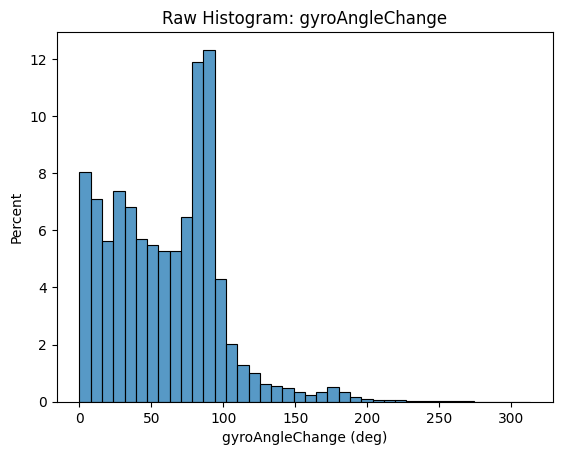

gyroAngleChange kept 55754 / 56566


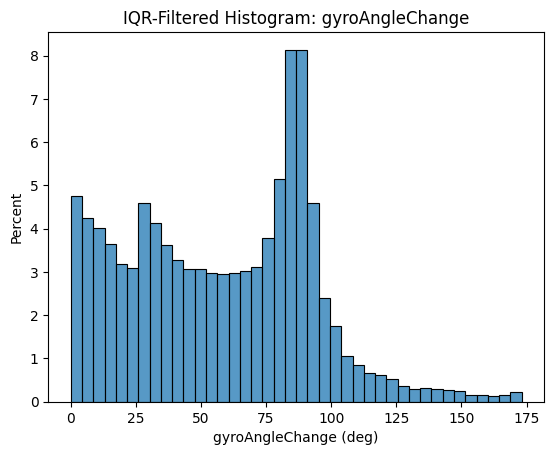

In [18]:
# === gyroAngleChange (deg): drop negatives/NaN, IQR filter ===
if "gyroAngleChange" in df.columns:
    print(df["gyroAngleChange"].describe())

    sns.histplot(df["gyroAngleChange"], bins=40, stat="percent", edgecolor="black")
    plt.title("Raw Histogram: gyroAngleChange")
    plt.xlabel("gyroAngleChange (deg)")
    plt.ylabel("Percent")
    plt.show()

    m_before = len(df)
    tmp = df[df["gyroAngleChange"].notna() & (df["gyroAngleChange"] >= 0)].copy()
    q1, q3 = np.percentile(tmp["gyroAngleChange"], [25, 75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    df = tmp[(tmp["gyroAngleChange"] >= lower) & (tmp["gyroAngleChange"] <= upper)]
    print(f"gyroAngleChange kept {len(df)} / {m_before}")

    sns.histplot(df["gyroAngleChange"], bins=40, stat="percent", edgecolor="black")
    plt.title("IQR-Filtered Histogram: gyroAngleChange")
    plt.xlabel("gyroAngleChange (deg)")
    plt.ylabel("Percent")
    plt.show()

count     55754.000000
mean        123.994825
std        2519.731676
min           0.396203
25%          13.568543
50%          24.558008
75%          48.953688
max      288211.660000
Name: mems_radius, dtype: float64


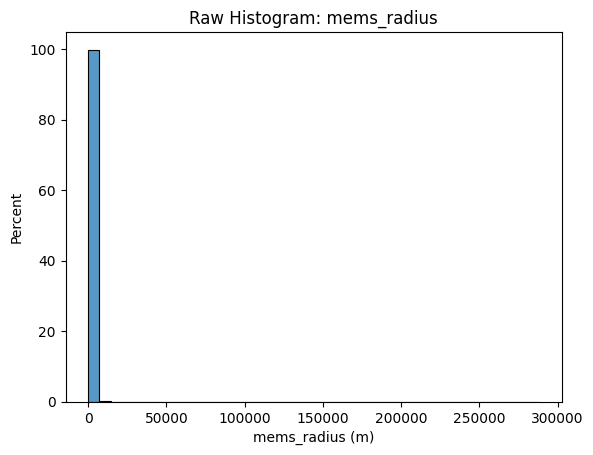

mems_radius kept 50222 / 55754


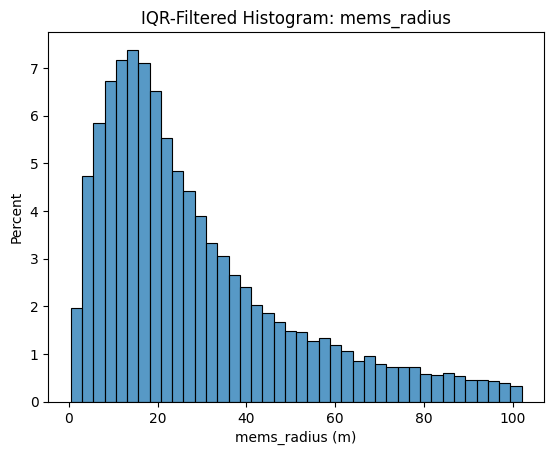

In [19]:
# === mems_radius (m): positive + IQR filter; show per-source too ===
if "mems_radius" in df.columns:
    print(df["mems_radius"].describe())

    sns.histplot(df["mems_radius"], bins=40, stat="percent", edgecolor="black")
    plt.title("Raw Histogram: mems_radius")
    plt.xlabel("mems_radius (m)")
    plt.ylabel("Percent")
    plt.show()

    m_before = len(df)
    tmp = df[df["mems_radius"].notna() & (df["mems_radius"] > 0)].copy()
    q1, q3 = np.percentile(tmp["mems_radius"], [25, 75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    df = tmp[(tmp["mems_radius"] >= lower) & (tmp["mems_radius"] <= upper)]
    print(f"mems_radius kept {len(df)} / {m_before}")

    sns.histplot(df["mems_radius"], bins=40, stat="percent", edgecolor="black")
    plt.title("IQR-Filtered Histogram: mems_radius")
    plt.xlabel("mems_radius (m)")
    plt.ylabel("Percent")
    plt.show()

In [20]:
# === Save cleaned ===
print("Final shape:", df.shape)
df.to_csv("parent_clean_Turat.csv", index=False)
print("Saved to parent_clean_Turat.csv")

Final shape: (50222, 27)
Saved to parent_clean_Turat.csv
